# Laboratory session 06

 Capettini Hilario (Matricola N. 2013031)

In [1]:
#Imports
library("tibble")
library("tidyverse")
library("magrittr")
library(Bolstad2)       #integral

library(showtext)
showtext_auto()

set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.3     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

Loading required package: sysfonts
Loading required package: showtextdb


##  Exercise 1


-  The number of particles emitted by a radioactive source during a fixed interval of time $(\Delta t = 10 s)$ follows a Poisson distribution on the parameter $\mu$. The number of particles observed during consecutive time intervals is: $4, 1, 3, 1, 3$


###  suppose a uniform prior distribution for the parameter $\mu$

- determine and draw the posterior distribution for μ, given the data
 

- evaluate mean, median and variance, both analytically and numerically in R



In [2]:
#We are in presence of a Poisson process and we want to use a uniform prior
#this can be represented by a Gamma function with alpha = 1 lambda=0

#measurements
samples <- c(4,1,3,1,3)
n       <- length(samples)

#Prior
x <- seq(0,10,0.01)
alpha_pri  <- 1 
lambda_pri <- 0

u.prior  <- dgamma(x=x, shape=alpha_pri, rate=lambda_pri)

#Posterior
#It can berepresented by a Gamma(alpha,lambda) function with alpha=sum(x_i)+1 and lambda = 5
alpha_post  <- 1+sum(samples) 
lambda_post <- n

u.posterior  <- dgamma(x=x, shape=alpha_post, rate=lambda_post)

df1 <- data.frame(x, u.prior, u.posterior)

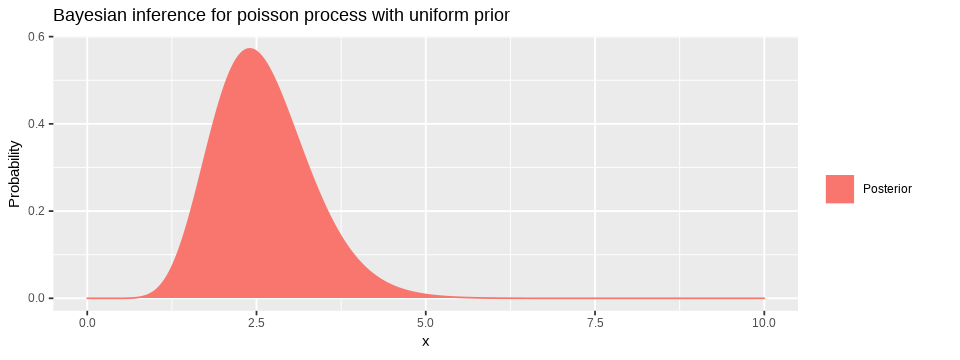

In [3]:
set_plot_dimensions(8, 3)
colors <- c('Posterior' = "#F8766D")

ggplot(df1, aes(x = x,y = u.posterior, color = 'Posterior')) +
    geom_area(fill='#F8766D')  +
    labs(title ="Bayesian inference for poisson process with uniform prior",
         x = "x",
         y = "Probability",
         color = "") +
    scale_color_manual(values = colors)

The mean of a Gamma($\alpha,\lambda$) function is given by
$$E = \frac{\alpha}{\lambda}$$

While the variance is given by
$$ Var =\frac{\alpha}{\lambda ^2}$$

In [4]:
u.mean <- sintegral(x,x*u.posterior)$int
u.variance <- sintegral(x, x*x * u.posterior)$int - u.mean**2

In [5]:
print(paste("The analitically obtained mean value for the posterior is =  ", sprintf("%.6f",alpha_post/lambda_post)))
print(paste("The numerically obtained mean value for the posterior is =  ", sprintf("%.6f",u.mean)))

[1] "The analitically obtained mean value for the posterior is =   2.600000"
[1] "The numerically obtained mean value for the posterior is =   2.599998"


In [6]:
print(paste("The analitically obtained variance value for the posterior is =  ", sprintf("%.5f",alpha_post/lambda_post**2)))
print(paste("The numerically obtained variance value for the posterior is =  ", sprintf("%.5f",u.variance)))

[1] "The analitically obtained variance value for the posterior is =   0.52000"
[1] "The numerically obtained variance value for the posterior is =   0.52001"


In [7]:
for (i in x){if (pgamma(i, shape=alpha_post, rate=lambda_post) >= 0.5){break}}
u.median <- i

print(paste("The numerically obtained median value for the posterior is =  ", sprintf("%.2f",u.median)))

[1] "The numerically obtained median value for the posterior is =   2.54"


###  suppose a Jeffrey’s prior for the parameter $\mu$

- determine and draw the posterior distribution for $\mu$, given the data
 

- evaluate mean, median and variance, both analytically and numerically in R


In [8]:
#Prior
alpha_pri  <- 0.5
lambda_pri <- 0

j.prior  <- dgamma(x=x, shape=alpha_pri, rate=lambda_pri)

#Posterior
#It can berepresented by a Gamma(alpha,lambda) function with alpha=sum(x_i)+0.5 and lambda = 5
alpha_post  <- alpha_pri + sum(samples) 
lambda_post <- lambda_pri + n

j.posterior  <- dgamma(x=x, shape=alpha_post, rate=lambda_post)

dfjef <- data.frame(x, j.prior, j.posterior)

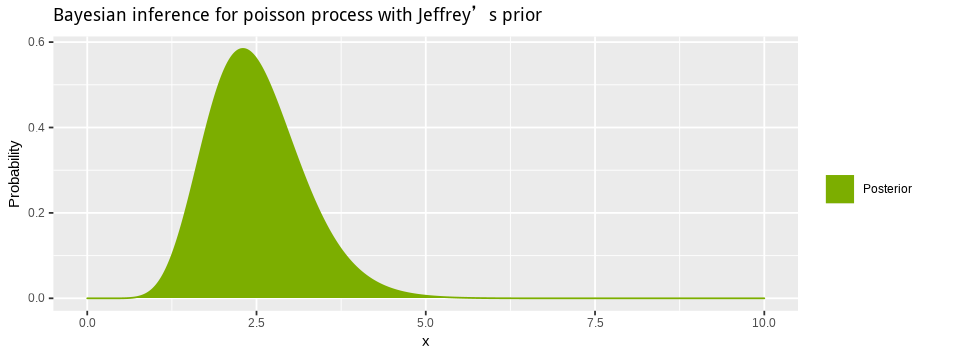

In [9]:
set_plot_dimensions(8, 3)
colors <- c('Posterior' = "#7CAE00")

ggplot(df1, aes(x = x,y = j.posterior, color = 'Posterior')) +
    geom_area(fill='#7CAE00')  +
    labs(title ="Bayesian inference for poisson process with Jeffrey’s prior",
         x = "x",
         y = "Probability",
         color = "") +
    scale_color_manual(values = colors)

In [10]:
j.mean <- sintegral(x,x*j.posterior)$int
j.variance <- sintegral(x, x*x * j.posterior)$int - j.mean**2

In [11]:
print(paste("The analitically obtained mean value for the posterior is =  ", sprintf("%.6f",alpha_post/lambda_post)))
print(paste("The numerically obtained mean value for the posterior is =  ", sprintf("%.6f",j.mean)))

[1] "The analitically obtained mean value for the posterior is =   2.500000"
[1] "The numerically obtained mean value for the posterior is =   2.499998"


In [12]:
print(paste("The analitically obtained variance value for the posterior is =  ", sprintf("%.5f",alpha_post/lambda_post**2)))
print(paste("The numerically obtained variance value for the posterior is =  ", sprintf("%.5f",j.variance)))

[1] "The analitically obtained variance value for the posterior is =   0.50000"
[1] "The numerically obtained variance value for the posterior is =   0.50001"


In [13]:
for (i in x){if (pgamma(i, shape=alpha_post, rate=lambda_post) >= 0.5){break}}
j.median <- i

print(paste("The numerically obtained median value for the posterior is =  ", sprintf("%.2f",j.median)))

[1] "The numerically obtained median value for the posterior is =   2.44"


###  evaluate a $95$% credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation


In [14]:
u.post.cdf  <- sintegral(x,u.posterior)
j.post.cdf  <- sintegral(x,j.posterior)

d<-abs(u.post.cdf$y-0.025)
u.min <- u.post.cdf$x[max((1:length(u.post.cdf$y))[d==min(d)])]

d<-abs(u.post.cdf$y-0.975)
u.max <- u.post.cdf$x[max((1:length(u.post.cdf$y))[d==min(d)])]

d<-abs(j.post.cdf$y-0.025)
j.min <- j.post.cdf$x[max((1:length(j.post.cdf$y))[d==min(d)])]

d<-abs(j.post.cdf$y-0.975)
j.max <- j.post.cdf$x[max((1:length(j.post.cdf$y))[d==min(d)])]


In [15]:
print("For the uniform prior")
print(paste("The mean value is: ",sprintf("%.3f",u.mean)))
print(paste("The 95% credibility interval is: ","[",sprintf("%.3f",u.min),",",sprintf("%.3f",u.max),"]"))
print("")
print('For the Jeffreys prior')
print(paste("The mean value is: ",sprintf("%.3f",j.mean)))
print(paste("The 95% credibility interval is: ","[",sprintf("%.3f",j.min),",",sprintf("%.3f",j.max),"]"))

[1] "For the uniform prior"
[1] "The mean value is:  2.600"
[1] "The 95% credibility interval is:  [ 1.384 , 4.191 ]"
[1] ""
[1] "For the Jeffreys prior"
[1] "The mean value is:  2.500"
[1] "The 95% credibility interval is:  [ 1.304 , 4.061 ]"


In [16]:
#Now we want to estimate a confidence interval using the normal  approximation
#An interval of 95% correspond to 
z <- 1.96
z <- qnorm(0.975)

u.min.norm <- u.mean - z * sqrt(u.variance)
u.max.norm <- u.mean + z * sqrt(u.variance)

j.min.norm <- j.mean - z * sqrt(j.variance)
j.max.norm <- j.mean + z * sqrt(j.variance)

In [17]:
print("Using the normal approximation")

print(paste("The 95% credibility interval for the uniform prior is: ","[",sprintf("%.3f",u.min.norm),",",sprintf("%.3f",u.max.norm),"]"))
print("")
print(paste("The 95% credibility interval for the Jeffreys prior is: ","[",sprintf("%.3f",j.min.norm),",",sprintf("%.3f",j.max.norm),"]"))

[1] "Using the normal approximation"
[1] "The 95% credibility interval for the uniform prior is:  [ 1.187 , 4.013 ]"
[1] ""
[1] "The 95% credibility interval for the Jeffreys prior is:  [ 1.114 , 3.886 ]"


In [18]:
norm <- dnorm(x, u.mean, sd = sqrt(u.variance))
df <-data.frame(x, u.posterior, norm) 

Warning message:
“Removed 300 row(s) containing missing values (geom_path).”Warning message:
“Removed 300 row(s) containing missing values (geom_path).”

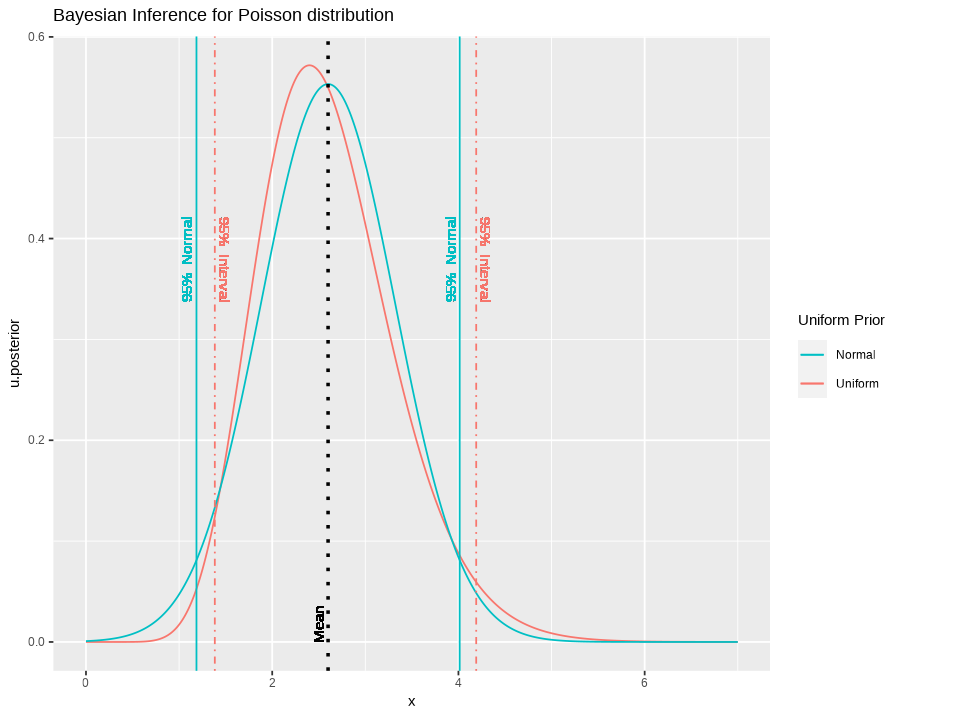

In [19]:
set_plot_dimensions(8, 6)
colors <- c('Normal' = "#00BFC4", 'Jeffreys' = "#7CAE00", 'Uniform' = "#F8766D")

ggplot(df,aes(x=x))+ 
    geom_line(aes(x=x, y = u.posterior, color = 'Uniform'))      +
    geom_line(aes(x=x, y = norm, color = 'Normal'))      +
    labs(title ="Bayesian Inference for Poisson distribution",
         x = "x",
         color = "Uniform Prior") +
    scale_color_manual(values = colors)+
    xlim(c(0,7))                                            +
    

#MEAN
geom_vline(xintercept = u.mean, colour="black", linetype="dotted", size = 1.0)+
geom_text(mapping=aes(x=u.mean, y=0,label="Mean"),colour="black", size=4, angle=90, vjust=-0.4, hjust=0)+

#Minimums
geom_vline(xintercept = u.min, colour="#F8766D", linetype="dotdash", size = 0.5)+
geom_text(mapping=aes(x=u.min, y=0,label="95%  Interval"),colour="#F8766D", size=4, angle=270, vjust=-0.4, hjust=5)+

geom_vline(xintercept = u.min.norm, colour="#00BFC4", size = 0.5)+
geom_text(mapping=aes(x=u.min.norm, y=0,label="95%  Normal"),colour="#00BFC4", size=4, angle=90, vjust=-0.4, hjust=-4)+


geom_vline(xintercept = u.max, colour="#F8766D", linetype="dotdash", size = 0.5)+
geom_text(mapping=aes(x=u.max, y=0,label="95%  Interval"),colour="#F8766D", size=4, angle=270, vjust=-0.4, hjust=5)+

geom_vline(xintercept = u.max.norm, colour="#00BFC4", size = 0.5)+
geom_text(mapping=aes(x=u.max.norm, y=0,label="95%  Normal"),colour="#00BFC4", size=4, angle=90, vjust=-0.4, hjust=-4)




In [20]:
norm <- dnorm(x, j.mean, sd = sqrt(j.variance))
df <-data.frame(x, j.posterior, norm)

Warning message:
“Removed 300 row(s) containing missing values (geom_path).”Warning message:
“Removed 300 row(s) containing missing values (geom_path).”

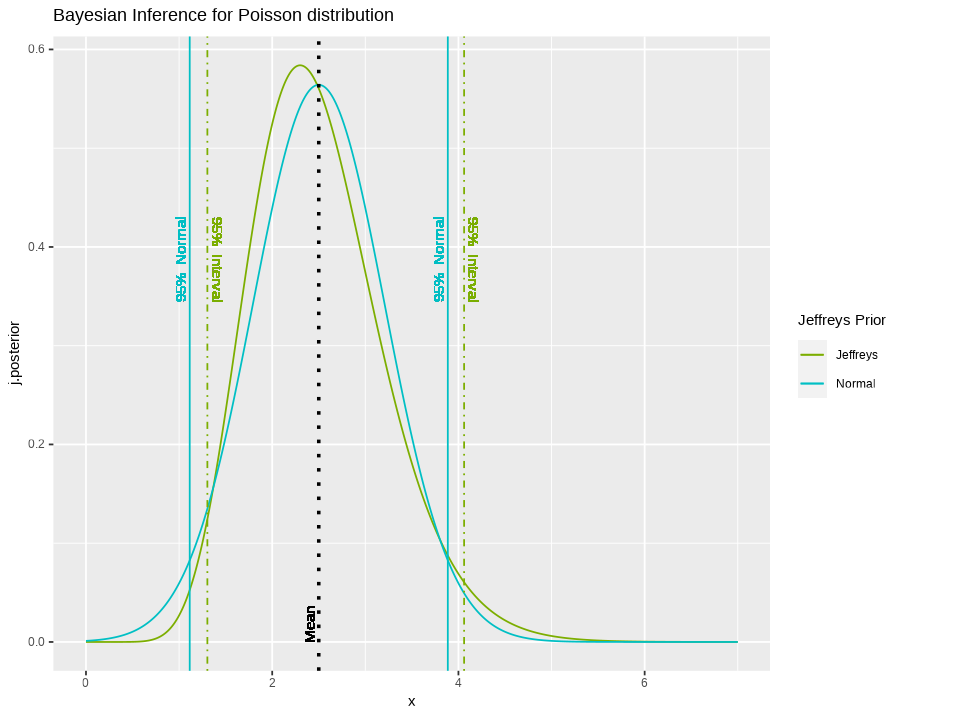

In [21]:
set_plot_dimensions(8, 6)
colors <- c('Normal' = "#00BFC4", 'Jeffreys' = "#7CAE00", 'Uniform' = "#F8766D")

ggplot(df,aes(x=x))+ 
    geom_line(aes(x=x, y = j.posterior, color = 'Jeffreys'))      +
    geom_line(aes(x=x, y = norm, color = 'Normal'))      +
    labs(title ="Bayesian Inference for Poisson distribution",
         x = "x",
         color = "Jeffreys Prior") +
    scale_color_manual(values = colors)+
    xlim(c(0,7))                                            +
    

#MEAN
geom_vline(xintercept = j.mean, colour="black", linetype="dotted", size = 1.0)+
geom_text(mapping=aes(x=j.mean, y=0,label="Mean"),colour="black", size=4, angle=90, vjust=-0.4, hjust=0)+

#Minimums
geom_vline(xintercept = j.min, colour="#7CAE00", linetype="dotdash", size = 0.5)+
geom_text(mapping=aes(x=j.min, y=0,label="95%  Interval"),colour="#7CAE00", size=4, angle=270, vjust=-0.4, hjust=5)+

geom_vline(xintercept = j.min.norm, colour="#00BFC4", size = 0.5)+
geom_text(mapping=aes(x=j.min.norm, y=0,label="95%  Normal"),colour="#00BFC4", size=4, angle=90, vjust=-0.4, hjust=-4)+


geom_vline(xintercept = j.max, colour="#7CAE00", linetype="dotdash", size = 0.5)+
geom_text(mapping=aes(x=j.max, y=0,label="95%  Interval"),colour="#7CAE00", size=4, angle=270, vjust=-0.4, hjust=5)+

geom_vline(xintercept = j.max.norm, colour="#00BFC4", size = 0.5)+
geom_text(mapping=aes(x=j.max.norm, y=0,label="95%  Normal"),colour="#00BFC4", size=4, angle=90, vjust=-0.4, hjust=-4)




## Exercise 2


- given the problem of the lighthouse discussed last week, study the case in which both the position along the shore $\alpha$ and the distance out at sea $\beta$ are unknown

- A lighthouse is located at a position $\alpha$ along the shore and at a distance $\beta$ out at sea

- It emits a series of short highly collimated flashes at random intervals and at random angles

- we detect the pulses on the cost using photo-detectors; they record only the position $x_k$ of the flash arrival on the coast, but not the angle of emission

- N flashes have been recorded at positions ${x_k}$ and we want to estimate the position of the lighthouse

<img src="images\lighthouse.png">

- it looks reasonable to assign a uniform likelihood pdf on the azimuth angle $\theta_k$

$$ p(\theta_k|\alpha, \beta) = \frac{1}{\pi}$$

- from the figure we have the following geometrical relation

$$ x_k - \alpha = \beta \, \text{tan}(\theta_k)$$

- we operate a change of variables on the pdf

$$p(X|M) = P(Y|M) \left\lvert\frac{dY}{dX}\right\lvert$$

using the transformation 

$$x = \beta \,\text{tan}\theta + \alpha$$

$$dx = \beta \frac{1}{\text{cos}^2\theta} d\theta \, = \, \beta \left[1+ \frac{(x-\alpha)^2}{\beta^2}\right]= \frac{\beta^2+ (x-\alpha)^2}{\beta}$$

we get

$$P(x|\alpha,\beta)=P(\theta|\alpha,\beta)\left|\frac{d\theta}{dx}\right| \,=\, \frac{1}{\pi}\frac{\beta}{\beta^2 +(x-\alpha)^2}$$

which turn to be a Cauchy distribution symetric around the maximum $\alpha$ and with a full width at half maximum of $2\beta$.

In [22]:
#Create a dataset given some value for the distances alpha and beta

#Real position
alpha.t <- 1 
beta.t  <- 3

#dataset
set.seed(123)
N  <- 100
theta <- runif(N,-pi/2,pi/2)

data <- beta.t * tan(theta) + alpha.t

In [23]:
p.log.like <- function(a, b,  data) {
    logL <- 0.0
    for (x in data) {
         logL <- logL - log(b**2 + (x -a)**2) + log(b/pi)
    }
    return(logL)
    }

In [24]:
n.sample <- 200
x.min <- -6; x.max <- +6
hx <- (x.max - x.min )/n.sample
alpha <- seq(from=x.min , by=hx, length.out=n.sample +1)

y.min <- 0 ; y.max <- +6
hy <- (y.max - y.min )/(n.sample/2)                   #so we have the same points density
beta <- seq(from=y.min , by=hy, length.out=n.sample +1)

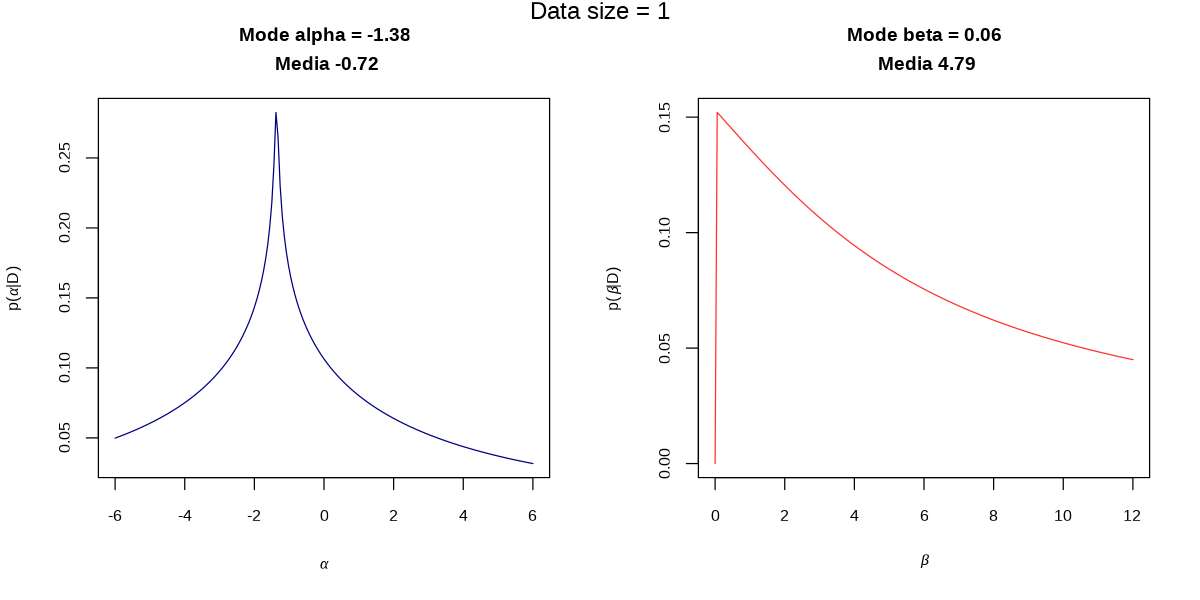

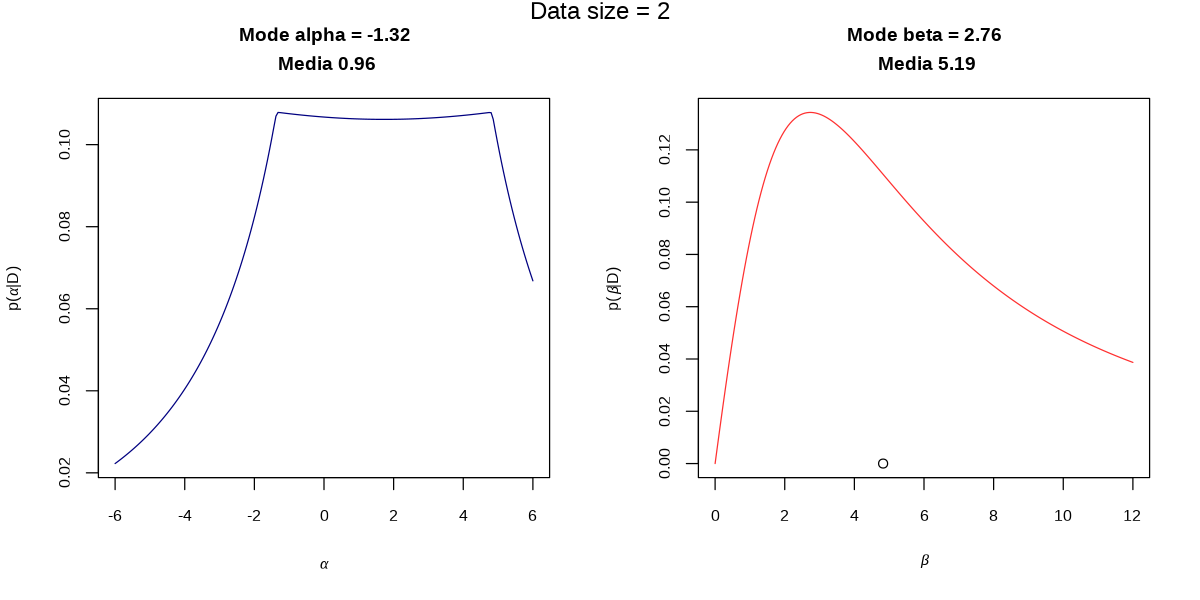

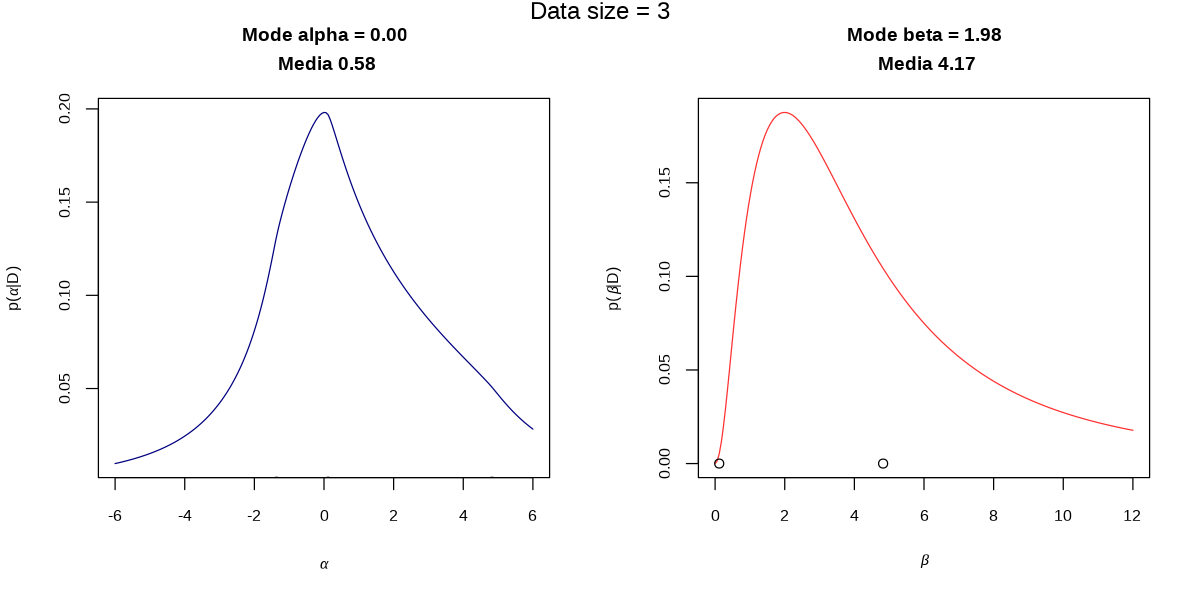

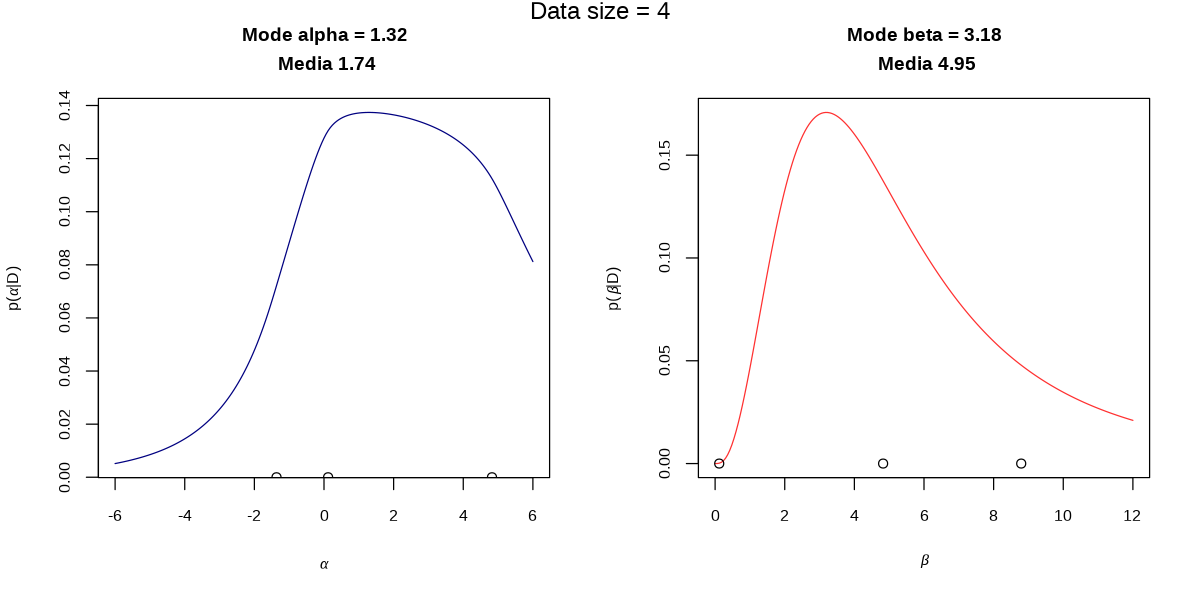

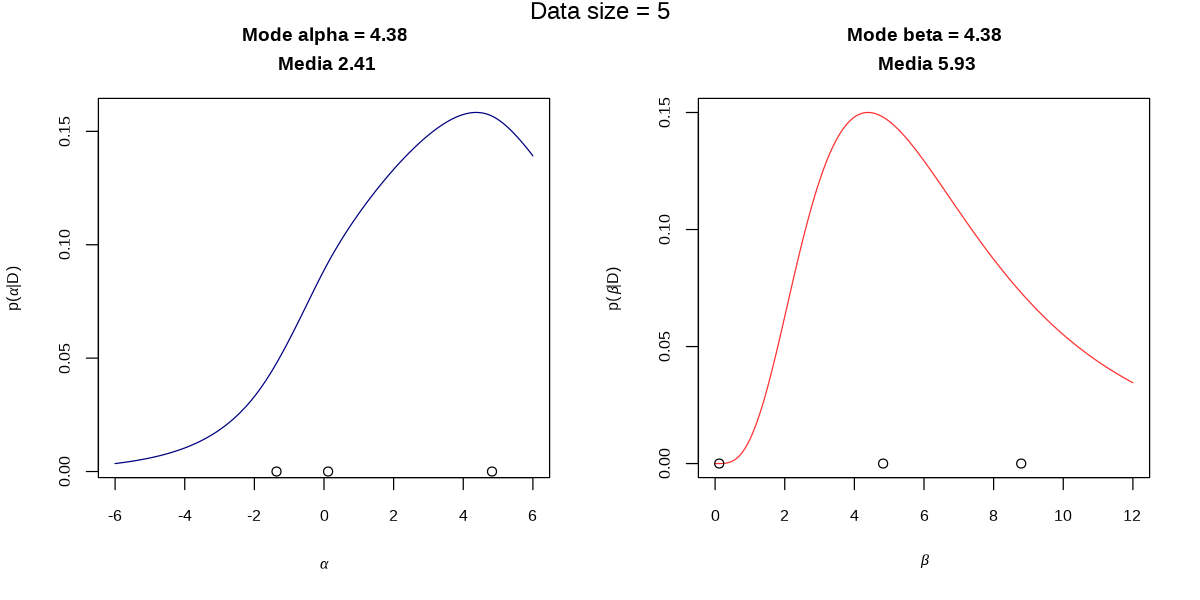

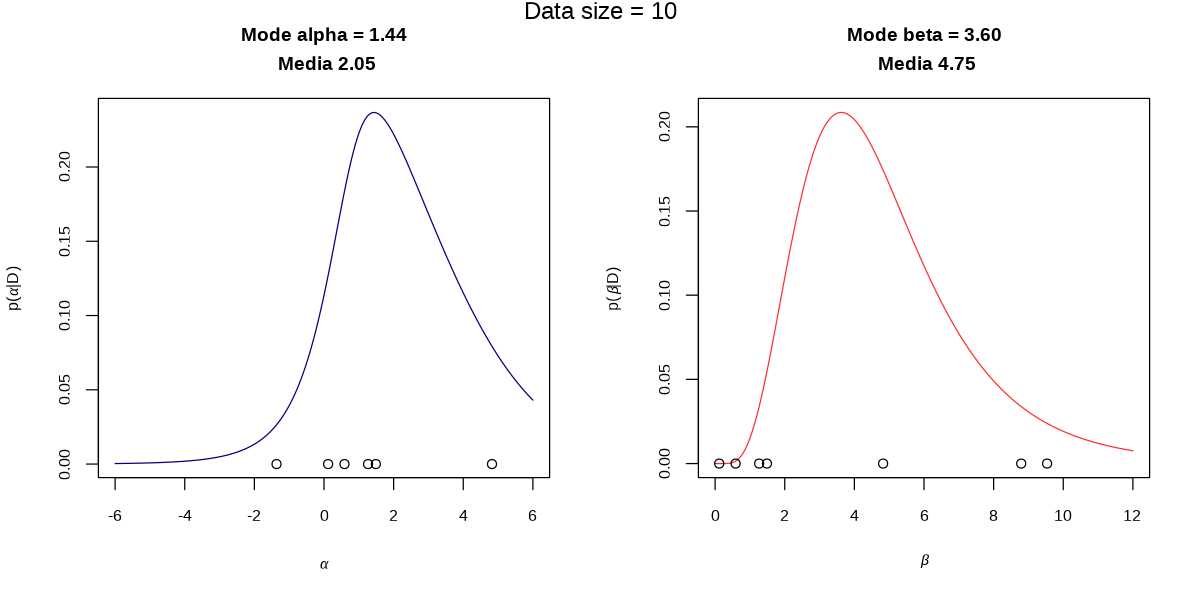

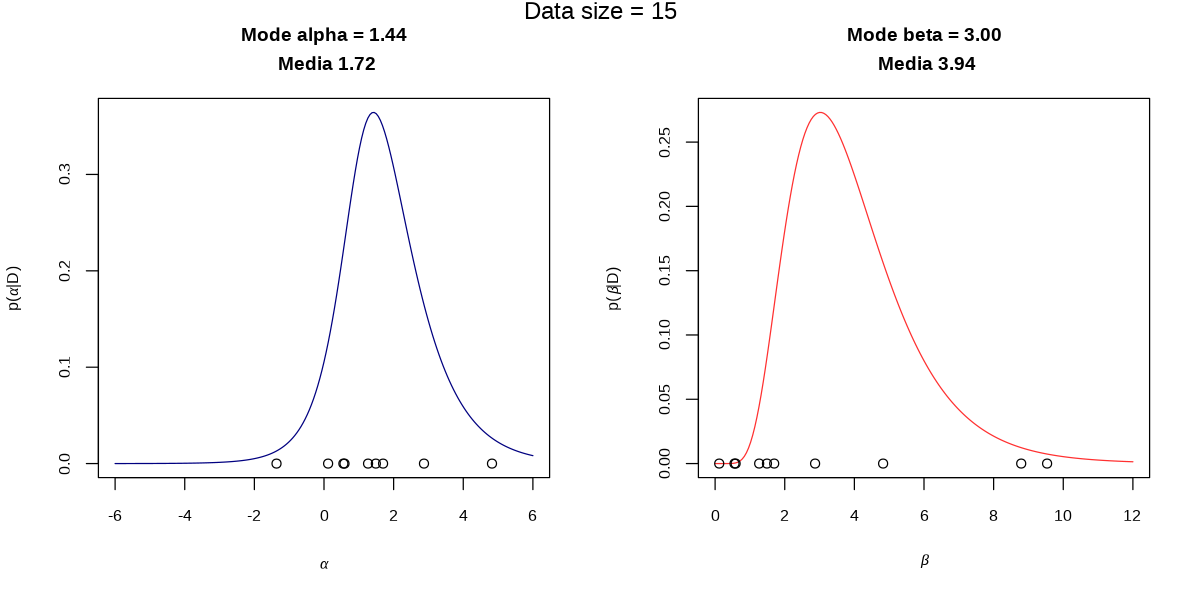

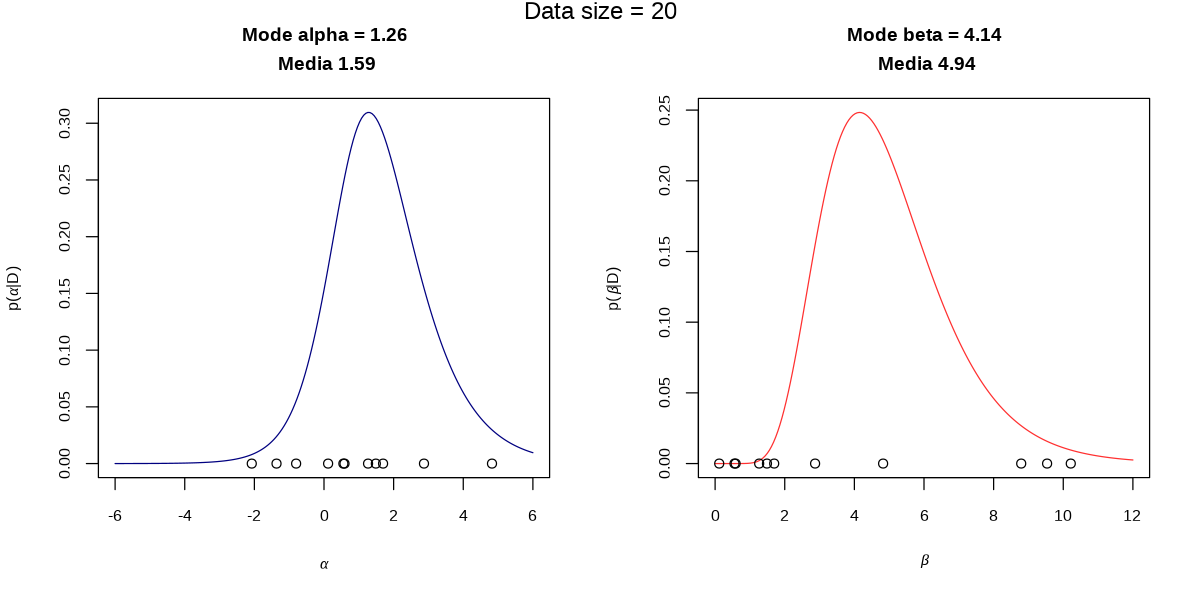

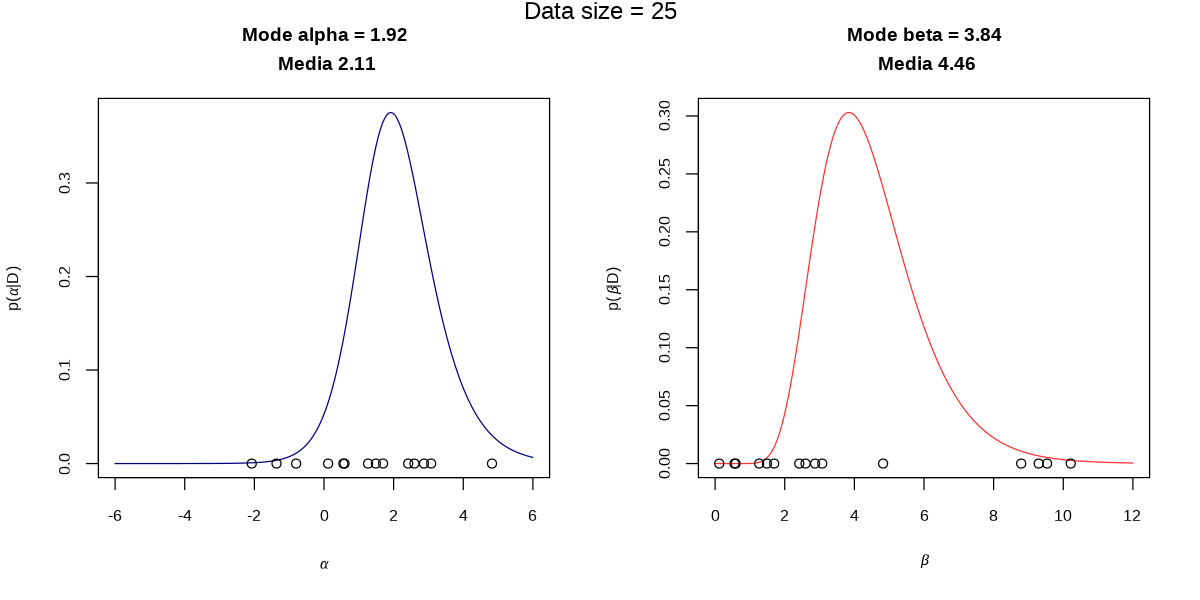

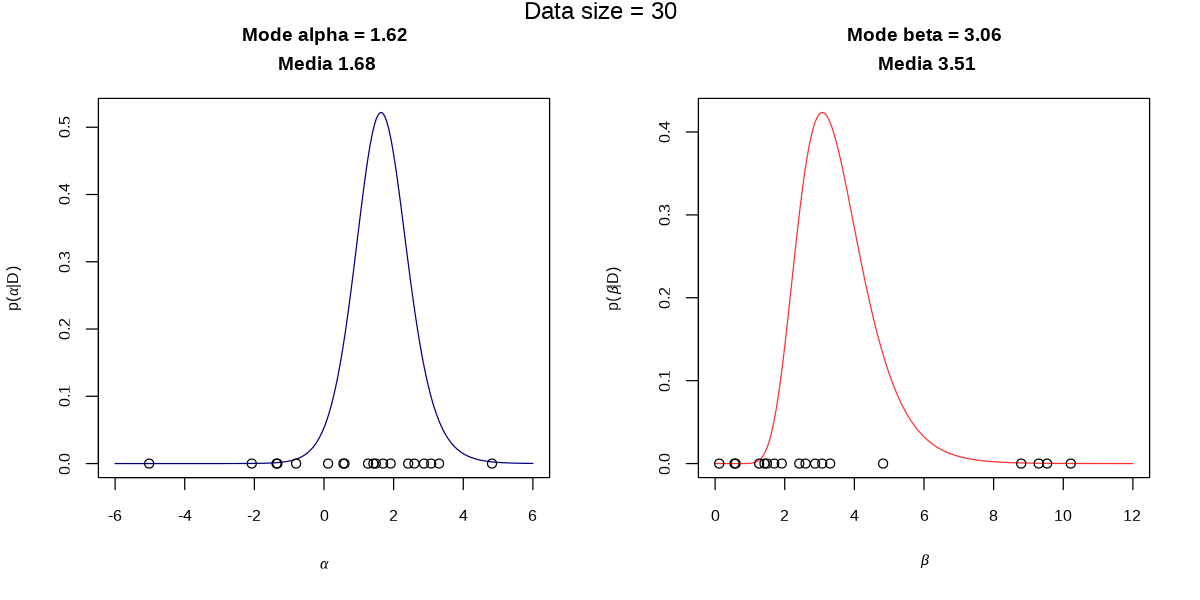

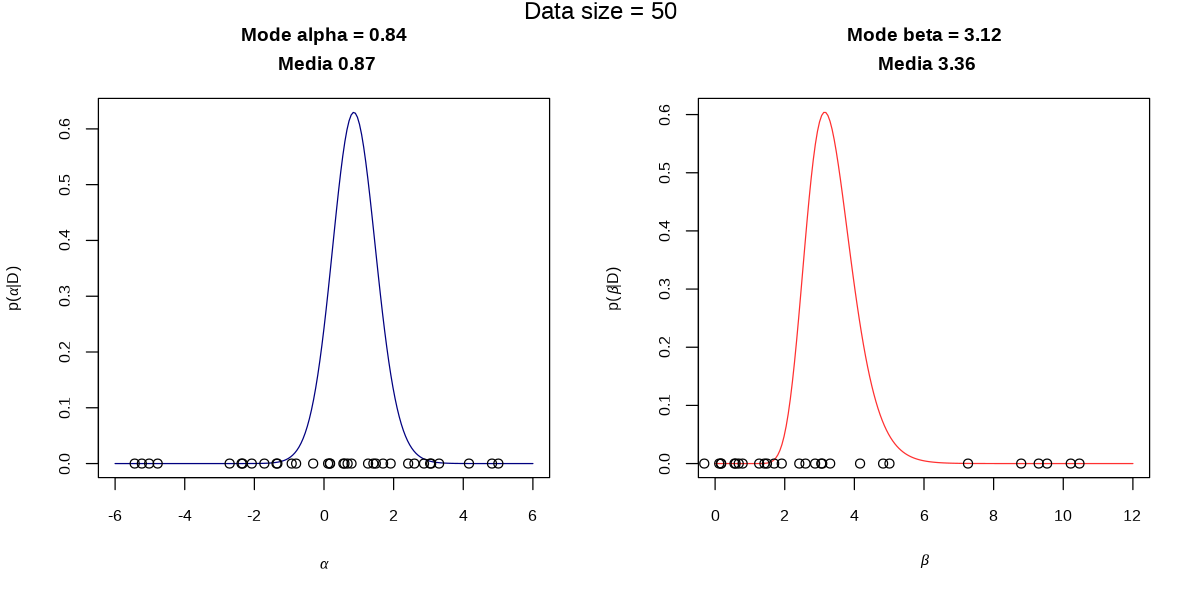

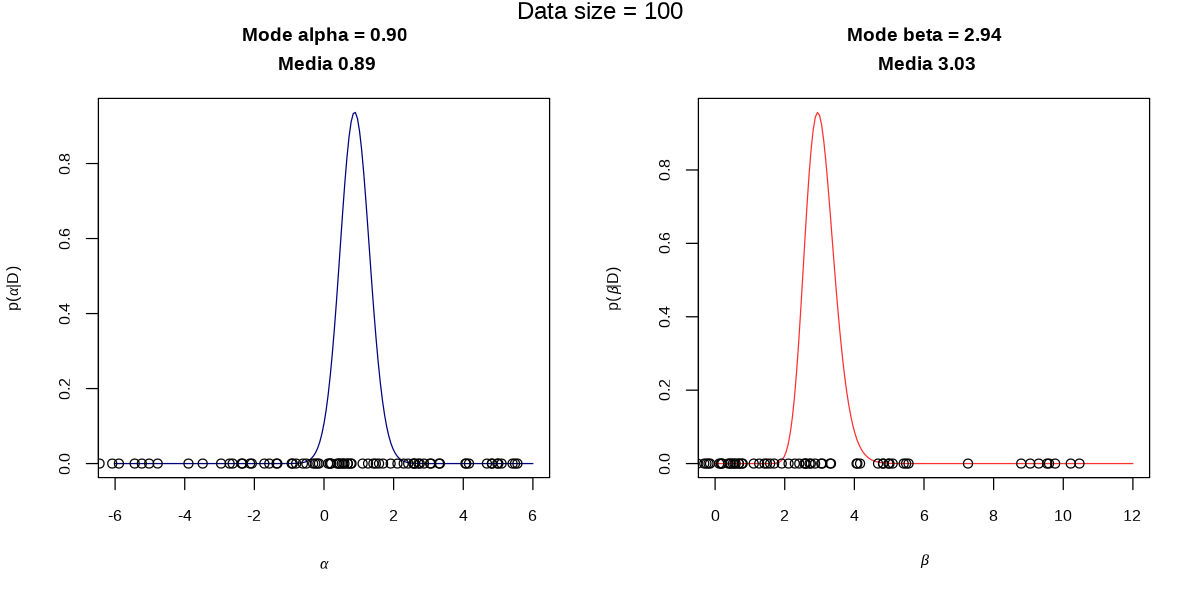

In [25]:
#In the following we will follow the result for an increasing number of data points
set_plot_dimensions(10, 5)
plots <- c(1, 2, 3, 4,  5, 10, 15, 20, 25, 30 ,50, 100)

alphas <- c()
betas <- c()
for (n.data in plots){
    samples <- data[1:n.data]
    
    #First we obtain the loglikelihood for each alpha,beta combination
    LoL <- matrix(data = NA, nrow = length(alpha), ncol = length(beta))
    for (i in 1:length(alpha)){
        for (j in 1:length(beta)){
            LoL[i,j] <- p.log.like(alpha[i], beta[j], samples)
        }
    }
    
    index.alpha.max <- which(LoL == max(LoL), arr.ind = TRUE)[1]
    index.beta.max  <- which(LoL == max(LoL), arr.ind = TRUE)[2]
    alpha.max <- alpha[index.alpha.max]
    alphas <- append(alphas, alpha.max)
    beta.max  <- beta[index.beta.max]
    betas <- append(betas, beta.max)

    #Doing the estimation using the LogLikelihood was a trick to avoid overflows
    #now we have to go back so we will exponentiate te LoL
    e.LoL <- exp(LoL)
    
    #Probability density of alpha conditional to the data (marginalize)
    p.alpha.data <- apply(e.LoL,1,sum)
    p.alpha.data <- p.alpha.data/(hx*sum(p.alpha.data))
    
    #Probability density of beta conditional to the data 
    p.beta.data <- apply(e.LoL,2,sum)
    p.beta.data <- p.beta.data/(hx*sum(p.beta.data))
    
    par(mfrow=c(1,2))
    

    plot(alpha,p.alpha.data,type="l",
     main = paste("Mode alpha =",sprintf("%.2f",alpha[which(p.alpha.data == max(p.alpha.data), arr.ind = TRUE)]),"\n",
                  "Media",sprintf("%.2f",hx*sum(p.alpha.data*alpha))),
     col = "navy",
     xlab = expression(alpha),
     ylab = expression(paste(p,"(",alpha, "|", D,")")),)
     points(x=samples, y = rep(0,length(samples)), type = "p",col="black")
    
    
    plot(beta,p.beta.data,type="l",
     main = paste("Mode beta =",sprintf("%.2f",beta[which(p.beta.data == max(p.beta.data), arr.ind = TRUE)]),"\n",
                  "Media",sprintf("%.2f",hy*sum(p.beta.data*beta))),
     col = "firebrick1",
     xlab = expression(beta),
     ylab = expression(paste(p,"(",beta, "|", D,")")),)
     points(x=samples, y = rep(0,length(samples)), type = "p",col="black")
    mtext(paste("Data size =",n.data), side = 3, line = -1, outer = TRUE,cex=1.5)
    

}

The circles represent the position of the flashes in the shore 

In [26]:
df <- data.frame(plots, alphas,betas)
col_names <- c("Samples", "Alpha", "Beta")
names(df) <- col_names

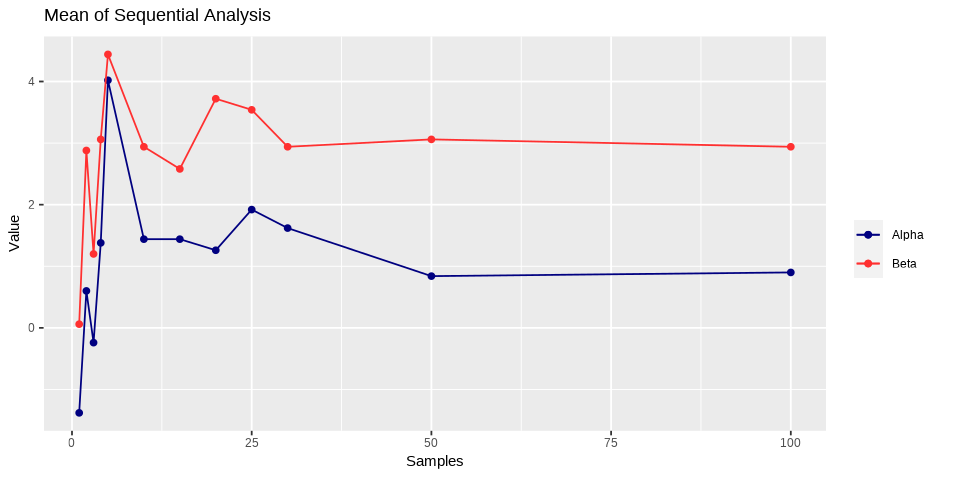

In [27]:
colors <- c('Alpha' = "navy", 'Beta' = "firebrick1")
set_plot_dimensions(8, 4)

ggplot(df, aes(x = Samples)) +
    geom_point (aes(y = Alpha, color = 'Alpha')) +
    geom_line (aes(y = Alpha, color = 'Alpha')) +
    geom_point (aes(y = Beta, color = 'Beta')) +
    geom_line (aes(y = Beta, color = 'Beta')) +
    labs(title ="Mean of Sequential Analysis",
         x = "Samples",
         y = "Value",
         color = "") +
    scale_color_manual(values = colors)

## Exercise 3


- given the signal over the background example discussed last week, analyze and discuss the following cases:

The following was the problem discussed during the lesson

In [28]:
plot_signal <- function(xdat,s.true,ddat) {
    par(mfrow = c(1,1))
    xplot <- seq(from = min(xdat), to = max(xdat), by = 0.05 * w)
    splot <- signal(xplot , A.true , B.true , x0, w, Delta.t)
    plot(xplot, splot,
        xlab = "x", ylab = "Signal + Background counts")
    par(new=TRUE)
    xdat.off <- xdat - 0.25
    plot(xdat.off , ddat, type = 's', col = 'firebrick',ylab="",
    lwd = 2, xlim = range(xplot), ylim =range(c(splot , ddat )))
}

In [29]:
print_results <- function (A.true,B.true,
                           mean_a, mean_b, rho_ab,
                           a, b, z,
                           p_a_D, p_a_bD, p_b_D, p_b_aD,
                           title) {

# Plot the 1D marginalized posteriors
par(mfrow = c(1,3))

contour (a, b, exp(z),
    nlevels = 10,
    labcex = 0.5,
    lwd = 1,
    xlim =c(0,5),
    ylim =c(0,2.5),
    xlab="amplitude , A",
    ylab="background , B")
abline (v=A.true,h=B.true,col="blue")

plot(b, p_b_D, xlab = "background , B", yaxs = "i",
     ylim = 1.05 * c(0,max(p_b_D, p_b_aD)), ylab = "P(B | D) and P(B | A,D)",
     type = "l", lwd = 2)
lines(b, p_b_aD , lwd = 2, lty = 2)
abline(v = B.true , col = "grey")
 
plot(a, p_a_D, xlab = "amplitude , A", yaxs = "i",
    ylim = 1.05 * c(0,max(p_a_D, p_a_bD)), ylab = "P(A | D) and P(A | B,D)",
    type = "l", lwd = 2)
lines (a, p_a_bD , lwd = 2, lty = 2)
abline (v = A.true , col = "grey")
mtext(paste(title), side = 3, line = -1, outer = TRUE,cex=1.2)
    
print(paste("a   = ", sprintf("%.3f",mean_a), "+/-", sprintf("%.3f",sd_a)))
print(paste("b   = ", sprintf("%.3f",mean_b), "+/-", sprintf("%.3f",sd_b)))
print(paste("rho = ", sprintf("%.3f",rho_ab) ))
}


### vary the sampling resolution used to generate the data, keeping the same sampling range

$\texttt{xdat <- seq(from=-7*w,to=7*w, by=0.5*w)}$

- change the resolution $w={0.1,0.25,1,2,3}$

- Check the effect on the results

In [30]:
# - Generative model
signal <- function (x, a, b, x0, w, t) {t * (a * exp(-(x-x0)**2/(2*w**2)) + b)
}

In [31]:
# Log posterior
log.post <- function (d, x, a, b, x0, w, t) {
                if(a < 0 || b < 0) {return (-Inf )} # the effect of the prior
    sum( dpois(d, lambda = signal (x, a, b, x0, w, t), log=TRUE ))
}

In [32]:
#Sampling grid for computing posterior
alim  <- c(0.0, 4.0)
blim  <- c(0.5, 1.5)
Nsamp <- 100
uniGrid <- seq(from = 1/(2* Nsamp ),
               to   = 1 - 1/(2*Nsamp), by=1/Nsamp)
delta_a <- diff(alim)/Nsamp
delta_b <- diff(blim)/Nsamp
a <- alim[1] + diff(alim )* uniGrid
b <- blim[1] + diff(blim )* uniGrid

In [33]:
# Define model parameters
x0      <- 0  #Signal peak
A.true  <- 2  #Signal amplitude
B.true  <- 1  #Background amplitude
Delta.t <- 5  #Exposure time

[1] "a   =  2.085 +/- 0.551"
[1] "b   =  0.931 +/- 0.551"
[1] "rho =  -0.077"


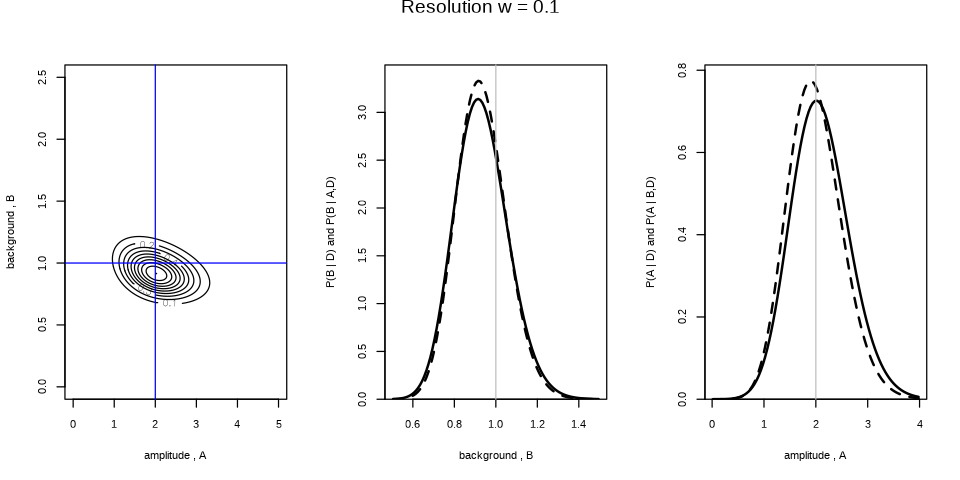

[1] "a   =  2.065 +/- 0.581"
[1] "b   =  1.217 +/- 0.581"
[1] "rho =  -0.075"


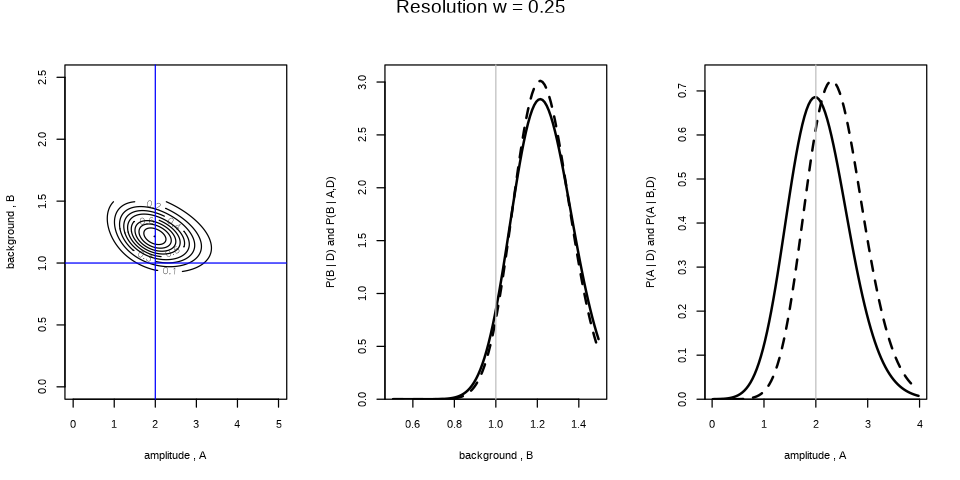

[1] "a   =  1.966 +/- 0.594"
[1] "b   =  1.044 +/- 0.594"
[1] "rho =  -0.093"


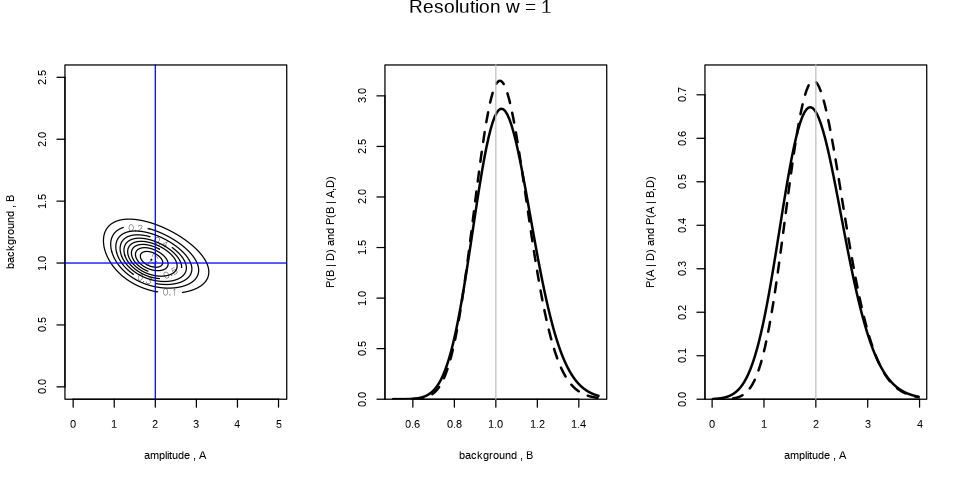

[1] "a   =  2.528 +/- 0.571"
[1] "b   =  0.882 +/- 0.571"
[1] "rho =  -0.074"


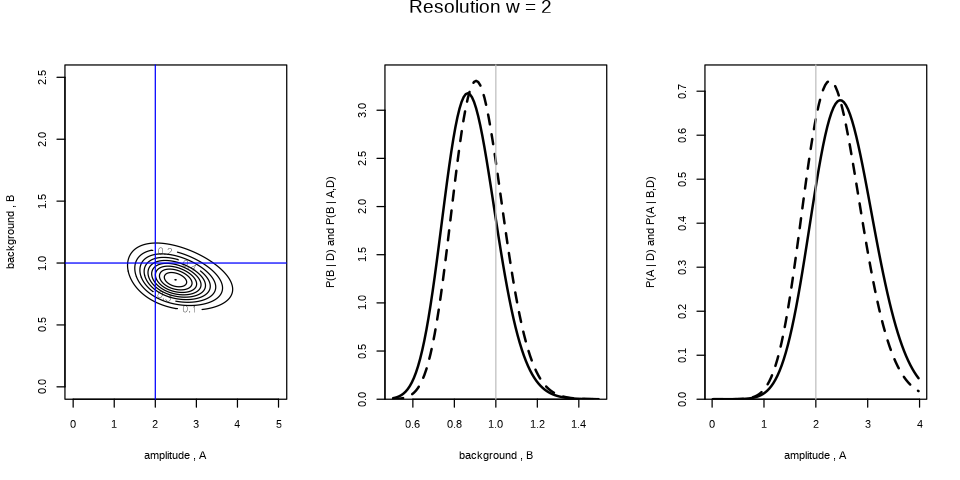

[1] "a   =  1.637 +/- 0.540"
[1] "b   =  0.926 +/- 0.540"
[1] "rho =  -0.092"


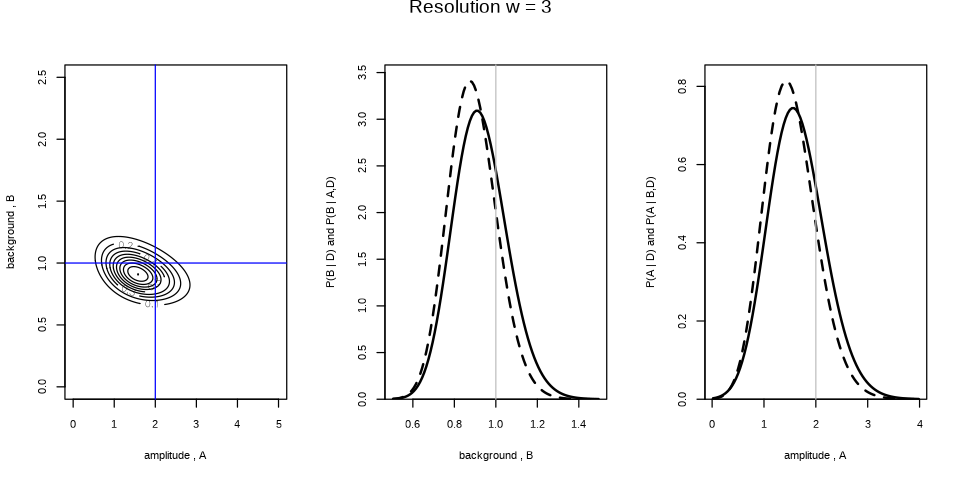

[1] "a   =  2.106 +/- 0.564"
[1] "b   =  0.835 +/- 0.564"
[1] "rho =  -0.081"


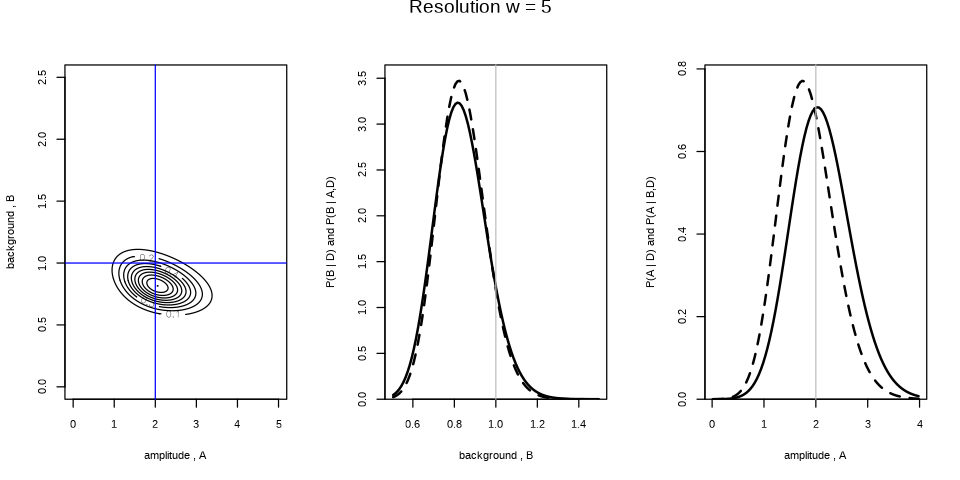

[1] "a   =  2.005 +/- 0.544"
[1] "b   =  0.878 +/- 0.544"
[1] "rho =  -0.078"


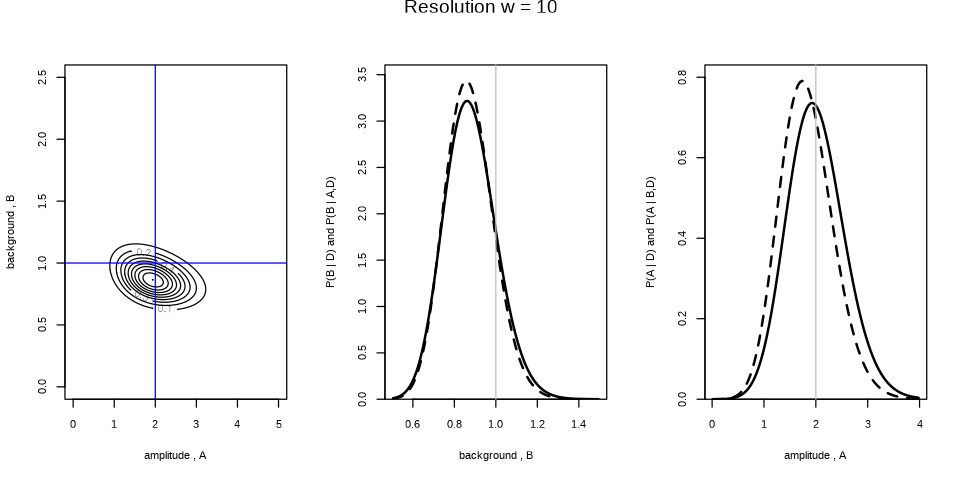

In [34]:
resolution <- c(0.1, 0.25, 1, 2, 3,5,10)
A.estimated <- c()
B.estimated <- c()
set.seed(205)
for (w in resolution) {
  # - Generate the observed data
    xdat   <- seq(from = -7 * w, to = 7 * w, by = w)
    s.true <- signal (xdat , A.true , B.true , x0, w, Delta.t)
    ddat   <- rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data = NA , nrow = length(a), ncol = length(b))

    for(j in 1: length (a)){
        for(k in 1: length (b)){
             z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero

    
    # Compute normalized marginalized posteriors , P(a|D) and P(b|D)
    # by summing over other parameter . Normalize by gridding .
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D / (delta_a * sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D / (delta_b * sum(p_b_D))

    # Compute mean , standard deviation , covariance , correlation , of A and B
    mean_a <- delta_a * sum(a * p_a_D)
    mean_b <- delta_b * sum(b * p_b_D)
    sd_a <- sqrt( delta_a * sum ((a-mean_a)**2 * p_a_D) )
    sd_b <- sqrt( delta_a * sum ((a-mean_a)**2 * p_a_D) )

    
    # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
    # using true values of conditioned parameters . Vectorize (func , par)
    # makes a vectorized function out of func in the parameter par.
    p_a_bD <- exp(Vectorize(log.post, "a")(ddat, xdat, a, B.true,
               x0, w, Delta.t))
    p_a_bD <- p_a_bD / (delta_a * sum(p_a_bD))
    p_b_aD <- exp(Vectorize(log.post, "b")(ddat ,xdat ,A.true ,b,
               x0, w, Delta.t))
    p_b_aD <- p_b_aD / (delta_b * sum(p_b_aD))
    
    

    # Covariance nurmalization is performed with ’brute force ’
    # The normalization constant is Z = delta_a* delta _b*sum(exp(z)).
    # This is independent of (a,b) so can be calculated outside of the loops .
    cov_ab <- 0
    for(j in 1: length (a)) {
        for(k in 1: length (b)) {
            cov_ab <- cov_ab + (a[j]-mean_a)*(b[k]-mean_b)* exp(z[j,k])
        }
    }
    cov_ab <- cov_ab / sum(exp(z))
    rho_ab <- cov_ab / (sd_a * sd_b)
    
    set_plot_dimensions(8, 4)
    print_results(A.true,B.true,mean_a, mean_b, rho_ab, a, b, z,p_a_D, p_a_bD, p_b_D, p_b_aD, paste("Resolution w =",w))
    
    A.estimated <- append(A.estimated, mean_a)
    B.estimated <- append(B.estimated, mean_b)
}

In [35]:
df <- data.frame(resolution, A.estimated,B.estimated)
col_names <- c("Resolution", "A", "B")
names(df) <- col_names

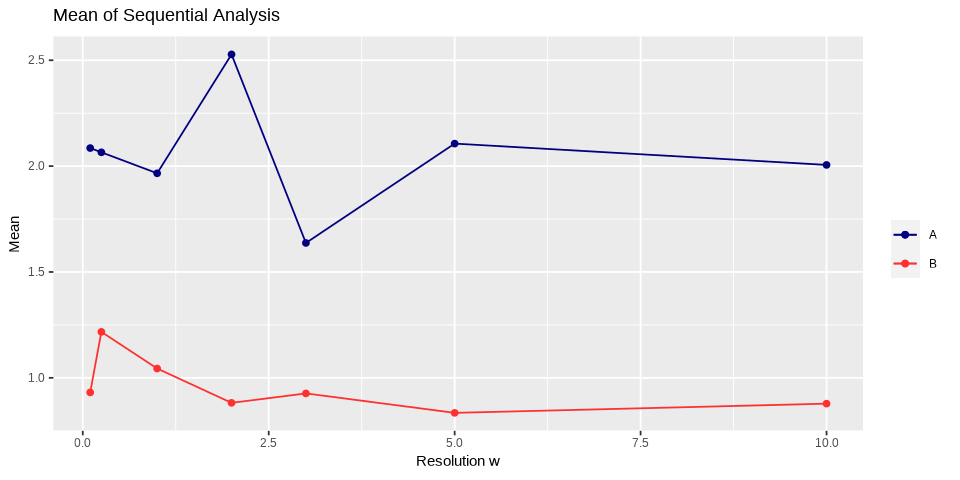

In [36]:
colors <- c('A' = "navy", 'B' = "firebrick1")
set_plot_dimensions(8, 4)

ggplot(df, aes(x = Resolution)) +
    geom_point (aes(y = A, color = 'A')) +
    geom_line (aes(y = A, color = 'A')) +
    geom_point (aes(y = B, color = 'B')) +
    geom_line (aes(y = B, color = 'B')) +
    labs(title ="Mean of Sequential Analysis",
         x = "Resolution w",
         y = "Mean",
         color = "") +
    scale_color_manual(values = colors)

### change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)

- Check the effect on the results

In [37]:
#Sampling grid for computing posterior
alim  <- c(0.0, 6.0)
blim  <- c(0., 2.5)
Nsamp <- 100
uniGrid <- seq(from = 1/(2* Nsamp ),
               to   = 1 - 1/(2*Nsamp), by=1/Nsamp)
delta_a <- diff(alim)/Nsamp
delta_b <- diff(blim)/Nsamp
a <- alim[1] + diff(alim )* uniGrid
b <- blim[1] + diff(blim )* uniGrid

In [38]:
# Define model parameters
x0      <- 0  #Signal peak
A.true  <- 1  #Signal amplitude
w       <- 1  #Resolution
B.true  <- 1  #Background amplitude
Delta.t <- 5  #Exposure time

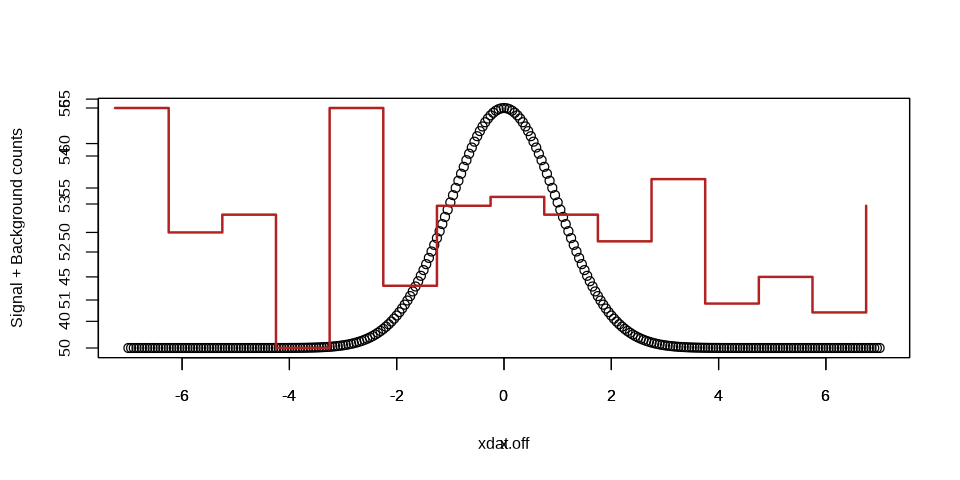

[1] "a   =  5.886 +/- 0.107"
[1] "b   =  2.487 +/- 0.107"
[1] "rho =  -0.000"


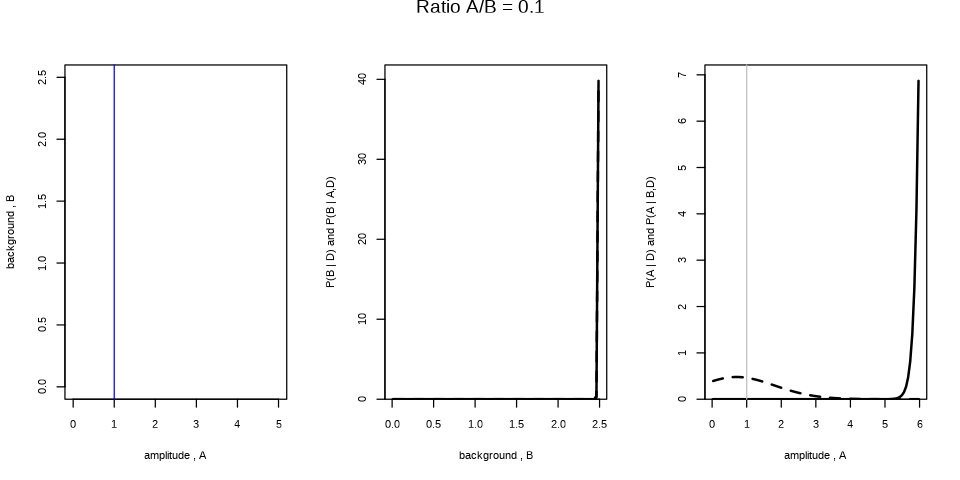

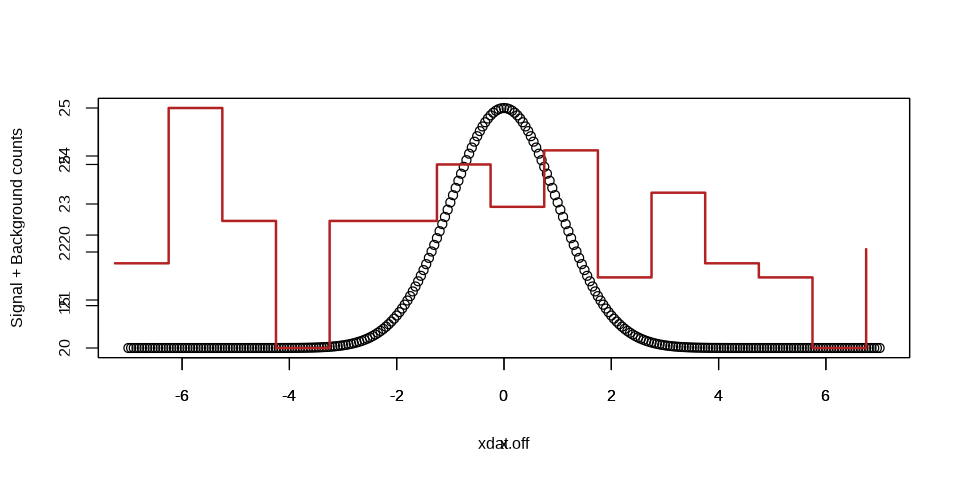

[1] "a   =  3.486 +/- 0.780"
[1] "b   =  2.466 +/- 0.780"
[1] "rho =  -0.003"


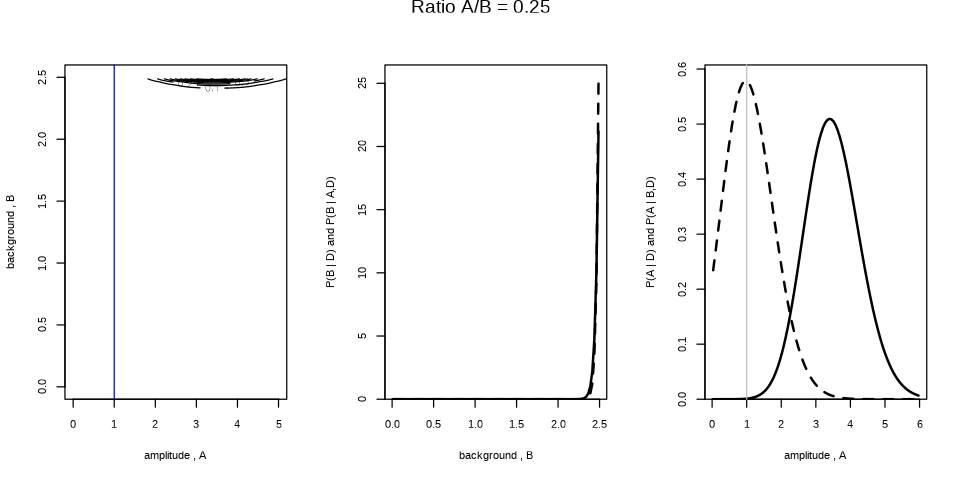

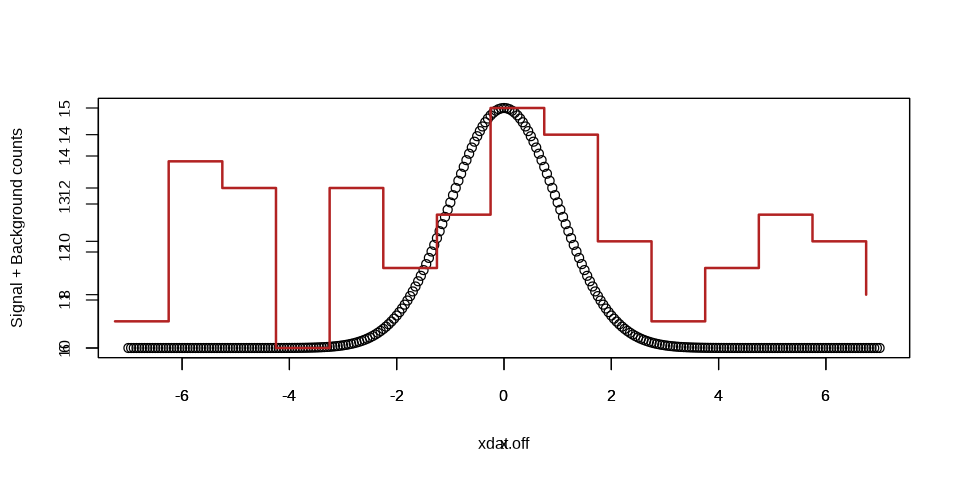

[1] "a   =  1.160 +/- 0.585"
[1] "b   =  1.886 +/- 0.585"
[1] "rho =  -0.121"


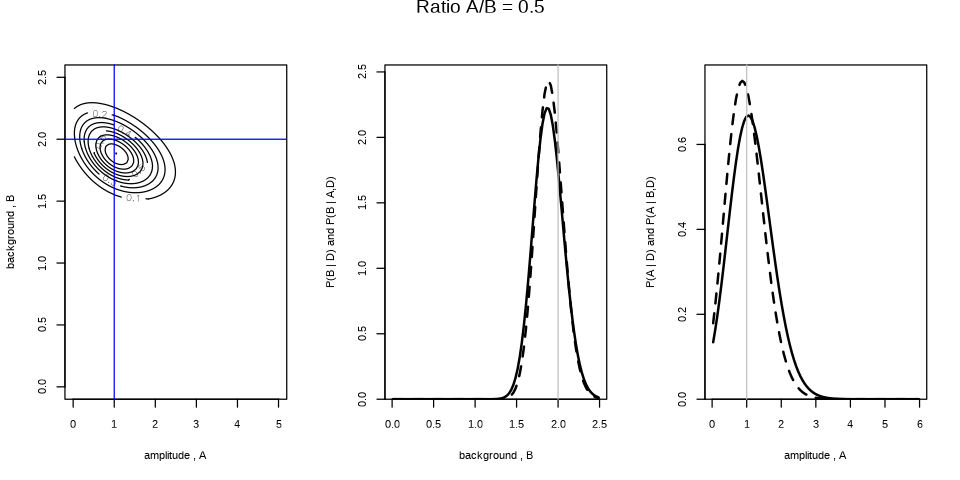

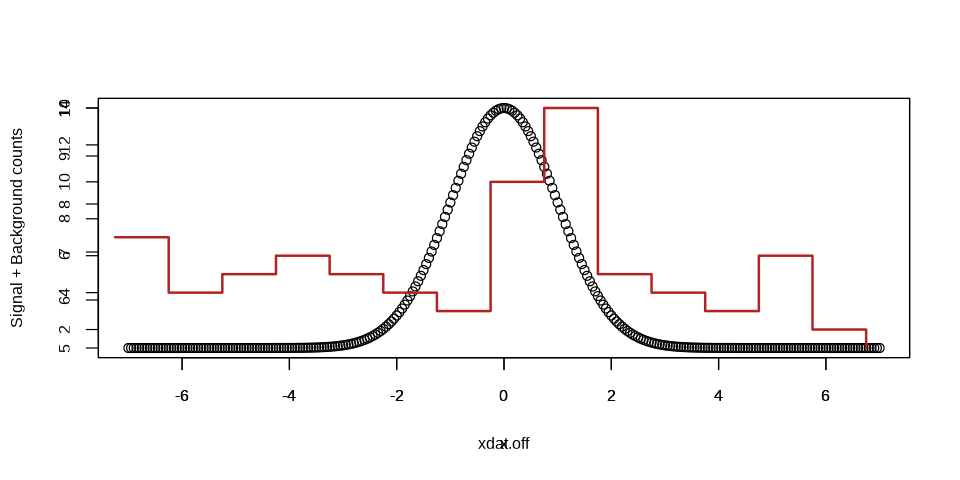

[1] "a   =  1.315 +/- 0.496"
[1] "b   =  0.860 +/- 0.496"
[1] "rho =  -0.096"


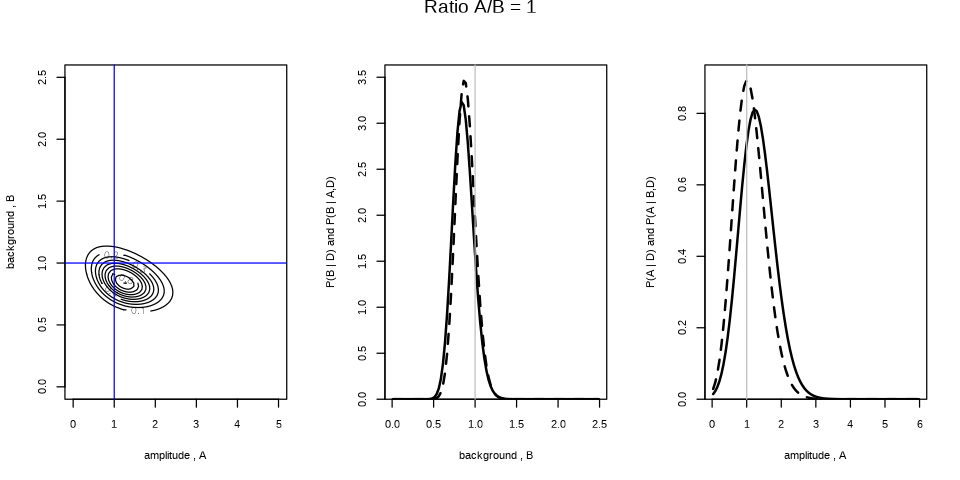

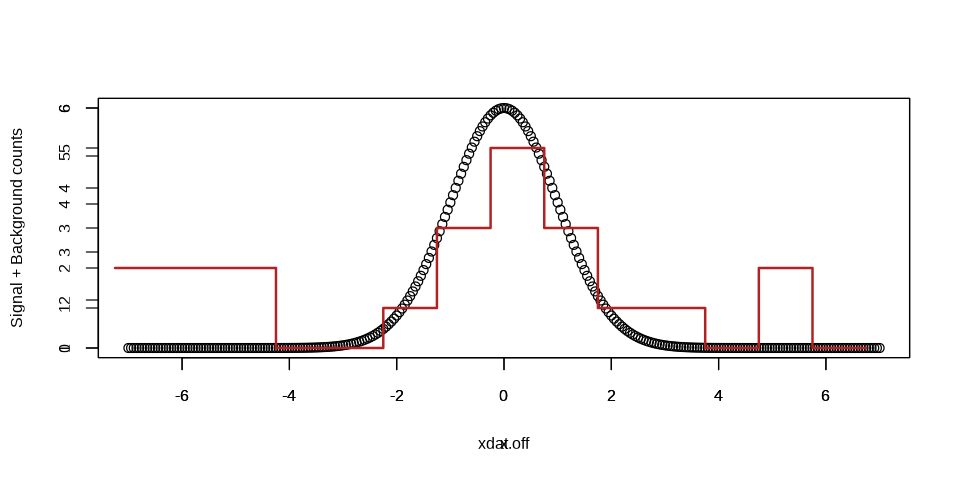

[1] "a   =  0.790 +/- 0.306"
[1] "b   =  0.188 +/- 0.306"
[1] "rho =  -0.055"


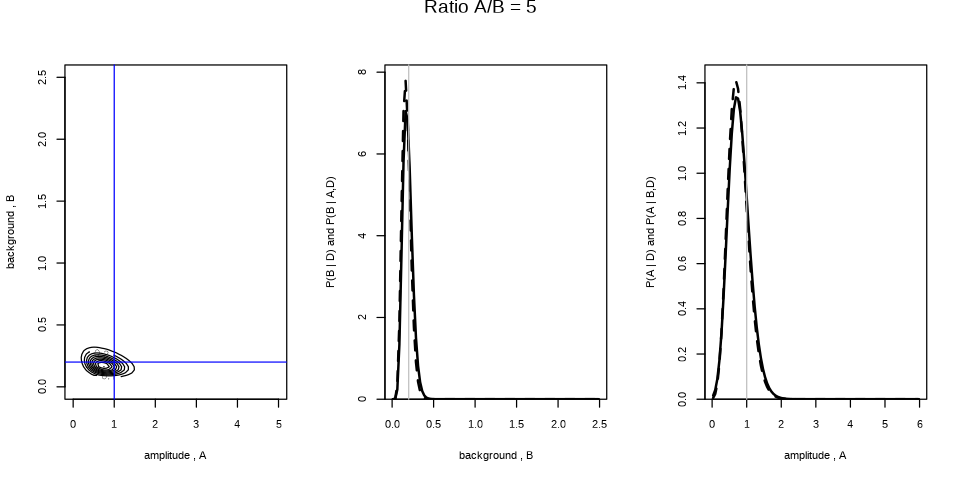

In [39]:
B.possible  <-  c(10, 4, 2, 1, 0.2)
A.estimated <- c()
B.estimated <- c()
set.seed(205)
for (B.true in B.possible) {
  # - Generate the observed data
    xdat   <- seq(from = -7 * w, to = 7 * w, by = w)
    s.true <- signal (xdat , A.true , B.true , x0, w, Delta.t)
    ddat   <- rpois(length(s.true), s.true)
    
    plot_signal(xdat,s.true,ddat)
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data = NA , nrow = length(a), ncol = length(b))

    for(j in 1: length (a)){
        for(k in 1: length (b)){
             z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero

    
    # Compute normalized marginalized posteriors , P(a|D) and P(b|D)
    # by summing over other parameter . Normalize by gridding .
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D / (delta_a * sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D / (delta_b * sum(p_b_D))

    # Compute mean , standard deviation , covariance , correlation , of A and B
    mean_a <- delta_a * sum(a * p_a_D)
    mean_b <- delta_b * sum(b * p_b_D)
    sd_a <- sqrt( delta_a * sum ((a-mean_a)**2 * p_a_D) )
    sd_b <- sqrt( delta_a * sum ((a-mean_a)**2 * p_a_D) )

    
    # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
    # using true values of conditioned parameters . Vectorize (func , par)
    # makes a vectorized function out of func in the parameter par.
    p_a_bD <- exp(Vectorize(log.post, "a")(ddat, xdat, a, B.true,
               x0, w, Delta.t))
    p_a_bD <- p_a_bD / (delta_a * sum(p_a_bD))
    p_b_aD <- exp(Vectorize(log.post, "b")(ddat ,xdat ,A.true ,b,
               x0, w, Delta.t))
    p_b_aD <- p_b_aD / (delta_b * sum(p_b_aD))
    
    

    # Covariance nurmalization is performed with ’brute force ’
    # The normalization constant is Z = delta_a* delta _b*sum(exp(z)).
    # This is independent of (a,b) so can be calculated outside of the loops .
    cov_ab <- 0
    for(j in 1: length (a)) {
        for(k in 1: length (b)) {
            cov_ab <- cov_ab + (a[j]-mean_a)*(b[k]-mean_b)* exp(z[j,k])
        }
    }
    cov_ab <- cov_ab / sum(exp(z))
    rho_ab <- cov_ab / (sd_a * sd_b)
    
    print_results(A.true,B.true, mean_a, mean_b, rho_ab, a, b, z,p_a_D, p_a_bD, p_b_D, p_b_aD,paste("Ratio A/B =",A.true/B.true))

    A.estimated <- append(A.estimated, mean_a)
    B.estimated <- append(B.estimated, mean_b)
}

In [40]:
df <- data.frame(B.possible, A.estimated,B.estimated)
col_names <- c("True B", "A", "B")
names(df) <- col_names

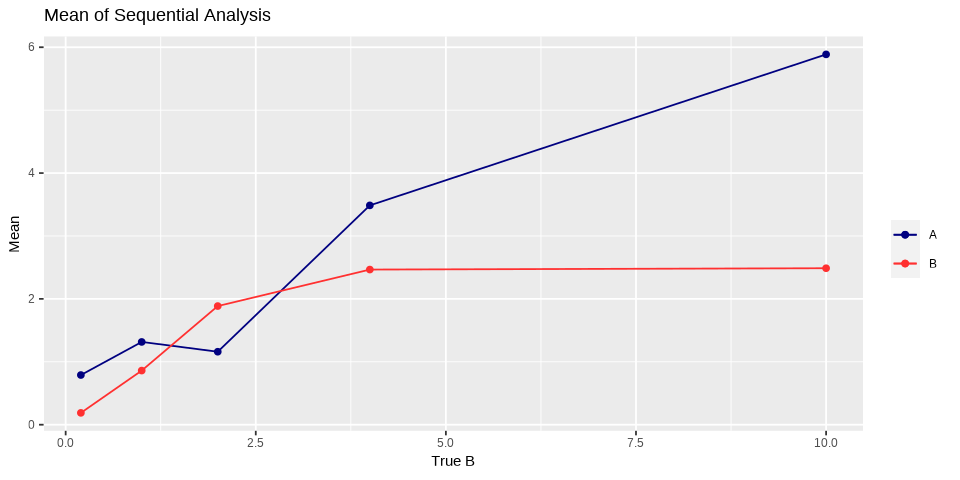

In [41]:
colors <- c('A' = "navy", 'B' = "firebrick1")
set_plot_dimensions(8, 4)

ggplot(df, aes(x = B.possible)) +
    geom_point (aes(y = A.estimated, color = 'A')) +
    geom_line (aes(y = A.estimated, color = 'A')) +
    geom_point (aes(y = B.estimated, color = 'B')) +
    geom_line (aes(y = B.estimated, color = 'B')) +
    labs(title ="Mean of Sequential Analysis",
         x = "True B",
         y = "Mean",
         color = "") +
    scale_color_manual(values = colors)